In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#See what is in the first dataset containing red wines
df_red = pd.read_csv("wine_quality.csv")
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#See what is in the second dataset containg white wines
df_white = pd.read_csv("winequality-white.csv")
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [5]:
#Clean up white wine data to be in the same format as dataset one
df_white = pd.read_csv("winequality-white.csv",sep=";",header=0)
df_white.columns=[x.replace(" ","_") for x in df_white.columns]
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Added wine type column in first dataset to label all of these wines red
df_red["wine_type"]="red"
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
#Added wine type column in second dataset to label all of these wines white
df_white["wine_type"]="white"
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
#Combining the first and second dataset of red and white wines
pd.concat([df_red, df_white], ignore_index=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
#Name new combined data frame
df_combined = pd.concat([df_red, df_white], ignore_index=True)

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
#Do we need to scale based on the range?
df_combined.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
#Export to csv file for Tableau
df_combined.to_csv("combined_datasets.csv")

In [13]:
#Creating a copy of data for processing
df_combined2 = df_combined.copy()
df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
df_combined2.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [15]:
#How many wines fall in each quality category
df_combined2.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [16]:
df_combined2.wine_type.value_counts()

wine_type
white    4898
red      1599
Name: count, dtype: int64

In [17]:
df_combined2.groupby("wine_type").quality.describe()

,count,mean,std,min,25%,50%,75%,max
wine_type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [18]:
df_combined2.groupby("wine_type").volatile_acidity.describe()

,count,mean,std,min,25%,50%,75%,max
wine_type,,,,,,,,
red,1599.0,0.527821,0.179060,0.12,0.39,0.52,0.64,1.58
white,4898.0,0.278241,0.100795,0.08,0.21,0.26,0.32,1.10


In [19]:
# fixing volatile_acidity
df_combined2.loc[(pd.isnull(df_combined2.volatile_acidity)) & (df_combined2.wine_type == "red"), "volatile_acidity"] = 0.5
df_combined2.loc[(pd.isnull(df_combined2.volatile_acidity)) & (df_combined2.wine_type == "white"), "volatile_acidity"] = 0.3

In [20]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [21]:
df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
#One-Hot Encoding
df_combined2["wine_type"] = np.where(df_combined2["wine_type"]=="red", 1, 0)
df_combined2.head()

#df_combined2["wine_type"] = df_combined2.wine_type.astype(str)
##df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [23]:
corrs = df_combined2.corr()
corrs

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


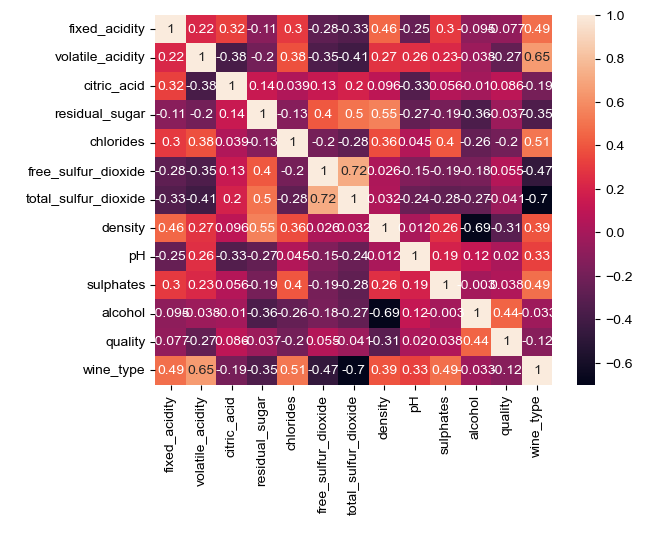

In [24]:
sns.heatmap(corrs, annot=True)
sns.set(font_scale=0.8)
plt.show()

In [25]:
# features
X = df_combined2.drop(["wine_type"], axis=1) # keep ALL features except for the target

# target
y = df_combined2.wine_type

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

print(X_train.shape)
print(X_test.shape)


(4872, 12)
(1625, 12)


In [26]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix: 
    [[3632   41]
 [  67 1132]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.98      0.99      0.99      3673
           1       0.97      0.94      0.95      1199

    accuracy                           0.98      4872
   macro avg       0.97      0.97      0.97      4872
weighted avg       0.98      0.98      0.98      4872

    



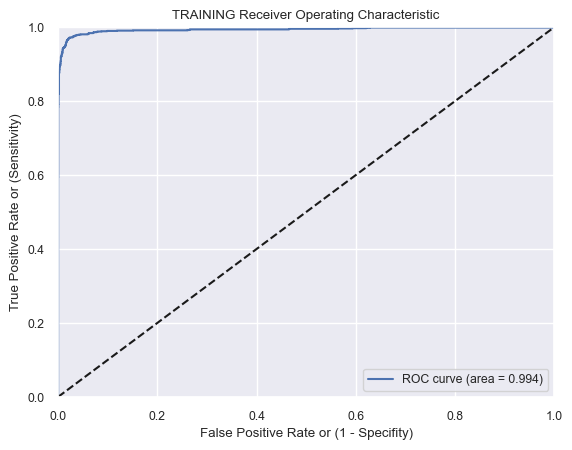



TESTING METRICS

    Test Confusion Matrix: 
    [[1215   10]
 [  14  386]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.97      0.96      0.97       400

    accuracy                           0.99      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625

    



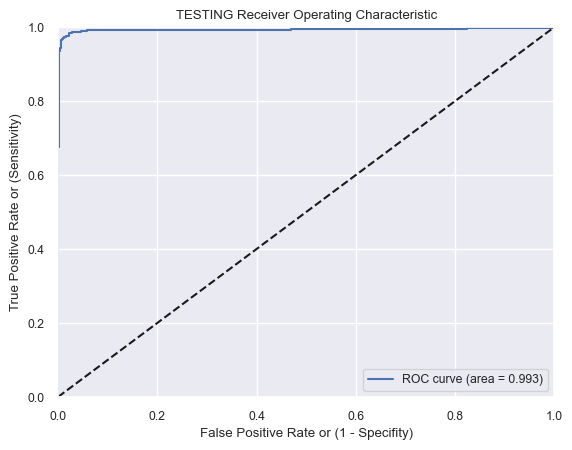

In [27]:
# initialize
lr = LogisticRegression()

# fit
lr.fit(X_train, y_train)

doClassification(lr, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[3605   68]
 [ 256  943]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.93      0.98      0.96      3673
           1       0.93      0.79      0.85      1199

    accuracy                           0.93      4872
   macro avg       0.93      0.88      0.91      4872
weighted avg       0.93      0.93      0.93      4872

    



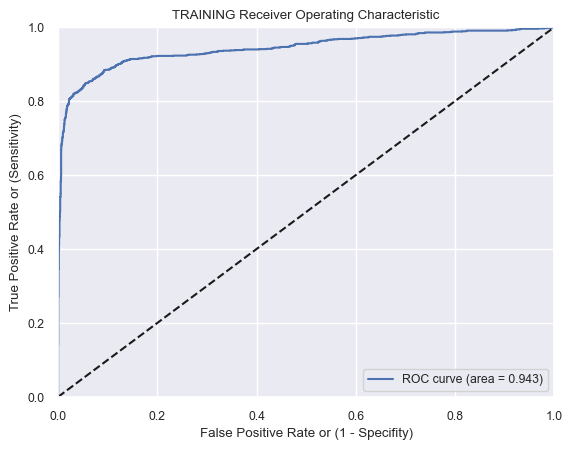



TESTING METRICS

    Test Confusion Matrix: 
    [[1207   18]
 [  79  321]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.94      0.99      0.96      1225
           1       0.95      0.80      0.87       400

    accuracy                           0.94      1625
   macro avg       0.94      0.89      0.92      1625
weighted avg       0.94      0.94      0.94      1625

    



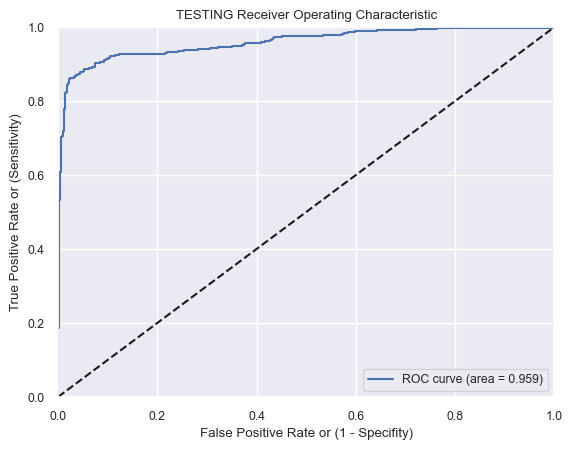

In [28]:
# initialize
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[3597   76]
 [ 164 1035]]

    Train Report: 
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97      3673
           1       0.93      0.86      0.90      1199

    accuracy                           0.95      4872
   macro avg       0.94      0.92      0.93      4872
weighted avg       0.95      0.95      0.95      4872

    



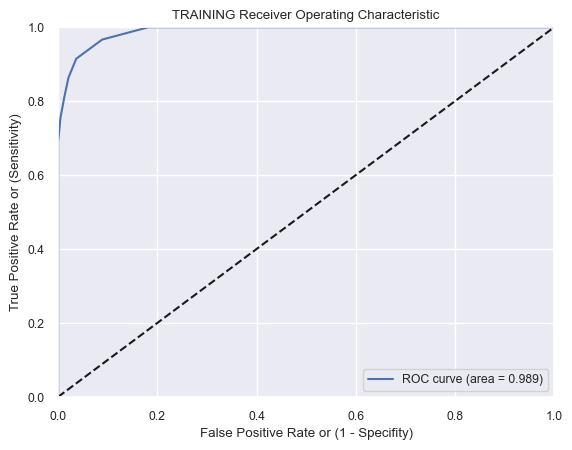



TESTING METRICS

    Test Confusion Matrix: 
    [[1197   28]
 [  59  341]]

    Test Report: 
                  precision    recall  f1-score   support

           0       0.95      0.98      0.96      1225
           1       0.92      0.85      0.89       400

    accuracy                           0.95      1625
   macro avg       0.94      0.91      0.93      1625
weighted avg       0.95      0.95      0.95      1625

    



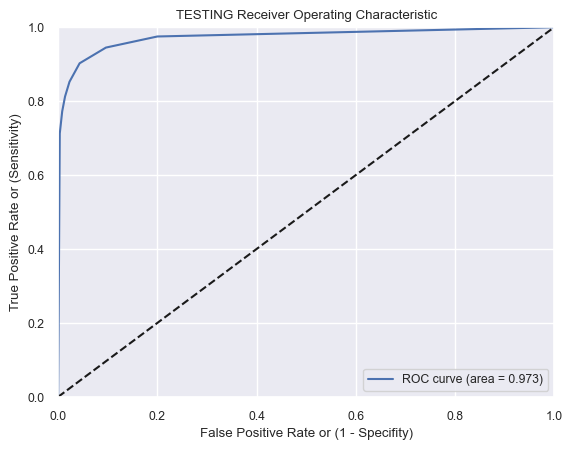

In [29]:
# initialize
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[3672    1]
 [   0 1199]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      3673
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

    



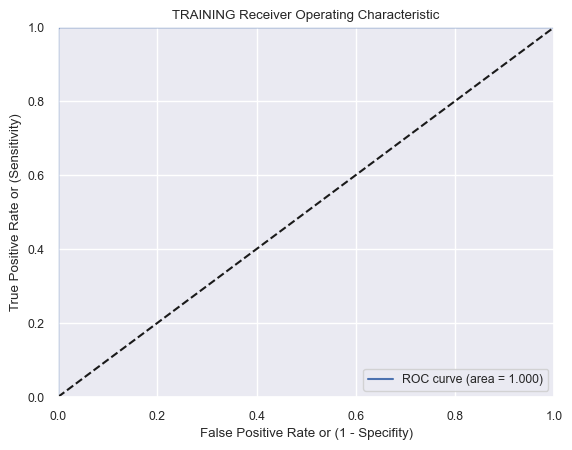



TESTING METRICS

    Test Confusion Matrix: 
    [[1223    2]
 [   5  395]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      0.99      0.99       400

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625

    



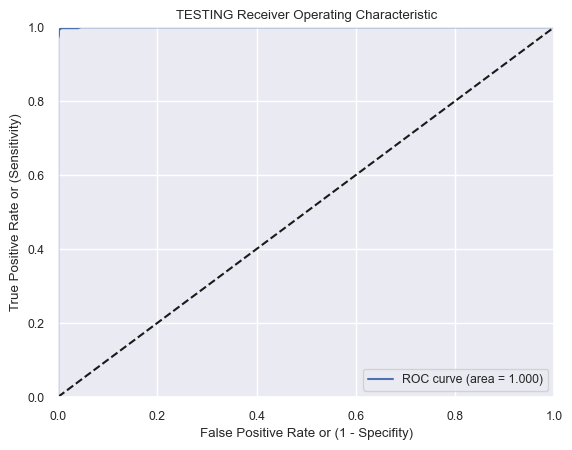

In [30]:
# initialize
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train, y_train)

doClassification(rf, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[3672    1]
 [   0 1199]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      3673
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

    



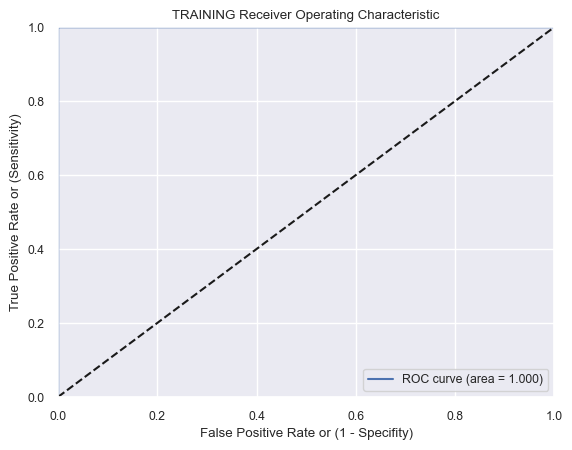



TESTING METRICS

    Test Confusion Matrix: 
    [[1222    3]
 [   1  399]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      1.00      1.00       400

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

    



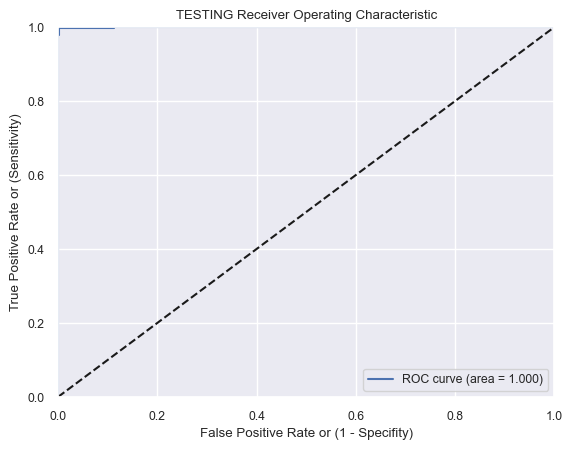

In [31]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train, y_train)

doClassification(xgb, X_train, X_test, y_train, y_test)

In [32]:
#Need to balance out the data to avoid skewed analysis
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (7346, 12)
After OverSampling, the shape of train_y: (7346,) 

After OverSampling, counts of label '1': 3673
After OverSampling, counts of label '0': 3673


In [34]:
# Resampled data
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train_res, y_train_res) 
  
predictions = lr.predict(X_test)
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1225
           1       0.94      0.98      0.96       400

    accuracy                           0.98      1625
   macro avg       0.97      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [35]:
#Trying with NearMiss
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 1199
Before Undersampling, counts of label '0': 3673 

After Undersampling, the shape of train_X: (2398, 12)
After Undersampling, the shape of train_y: (2398,) 

After Undersampling, counts of label '1': 1199
After Undersampling, counts of label '0': 1199


In [36]:
# Resampled data
# train the model on training set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.97      0.97      0.97       400

    accuracy                           0.99      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625



TRAINING METRICS

    Train Confusion Matrix: 
    [[3672    1]
 [   0 1199]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      3673
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

    



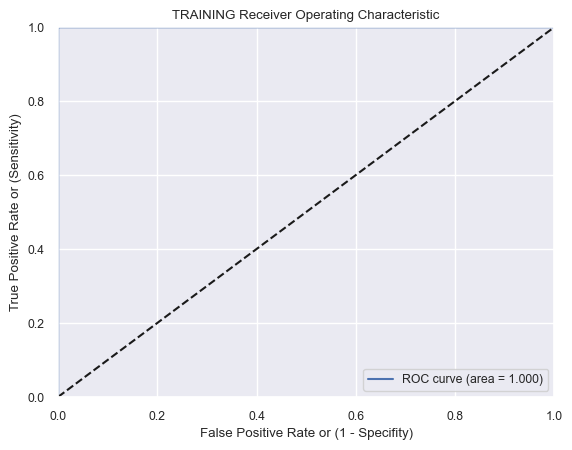



TESTING METRICS

    Test Confusion Matrix: 
    [[1222    3]
 [   1  399]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      1.00      1.00       400

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

    



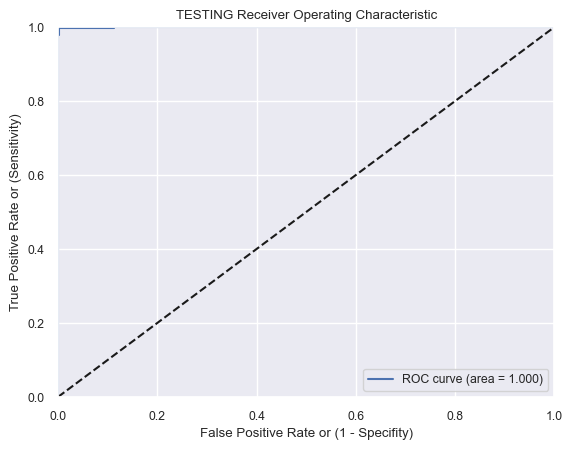

In [37]:
# Resampled data
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train, y_train)

doClassification(xgb, X_train, X_test, y_train, y_test)

In [ ]:
# Resampled data
#train the model on training set 
#lr2 = LogisticRegression() 
#lr2.fit(X_train_miss, y_train_miss.ravel()) 
#predictions = lr2.predict(X_test) 
  
#print classification report 
#print(classification_report(y_test, predictions)) 

#Used predictions from logistic regression model with re-samples NearMiss data#

In [100]:
import pickle
filename = 'wine_model.h5'

# Save the model object to a file
with open(filename, 'wb') as file:
    pickle.dump(predictions, file)

# Load the model object from the file
with open('wine_model.h5', 'rb') as file:
    loaded_model = pickle.load(file)

In [101]:
print(loaded_model)

[0 0 0 ... 0 0 0]
